In [2]:
# LSTM for international airline passengers problem with time step regression framing
import numpy
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [3]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [4]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [5]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

/home/schandrasekhar/kerasenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/schandrasekhar/kerasenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 1))`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/schandrasekhar/kerasenv/lib/python3.6/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
0s - loss: 0.0287
Epoch 2/100
0s - loss: 0.0117
Epoch 3/100
0s - loss: 0.0097
Epoch 4/100
0s - loss: 0.0086
Epoch 5/100
0s - loss: 0.0074
Epoch 6/100
0s - loss: 0.0065
Epoch 7/100
0s - loss: 0.0058
Epoch 8/100
0s - loss: 0.0053
Epoch 9/100
0s - loss: 0.0045
Epoch 10/100
0s - loss: 0.0044
Epoch 11/100
0s - loss: 0.0041
Epoch 12/100
0s - loss: 0.0041
Epoch 13/100
0s - loss: 0.0040
Epoch 14/100
0s - loss: 0.0039
Epoch 15/100
0s - loss: 0.0039
Epoch 16/100
0s - loss: 0.0039
Epoch 17/100
0s - loss: 0.0038
Epoch 18/100
0s - loss: 0.0039
Epoch 19/100
0s - loss: 0.0038
Epoch 20/100
0s - loss: 0.0038
Epoch 21/100
0s - loss: 0.0038
Epoch 22/100
0s - loss: 0.0038
Epoch 23/100
0s - loss: 0.0037
Epoch 24/100
0s - loss: 0.0038
Epoch 25/100
0s - loss: 0.0037
Epoch 26/100
0s - loss: 0.0038
Epoch 27/100
0s - loss: 0.0037
Epoch 28/100
0s - loss: 0.0038
Epoch 29/100
0s - loss: 0.0037
Epoch 30/100
0s - loss: 0.0036
Epoch 31/100
0s - loss: 0.0037
Epoch 32/100
0s - loss: 0.0036
Epoch 33/100
0s -

Train Score:  [[105.0838144]]
Test Score:  [[110.68770943]]


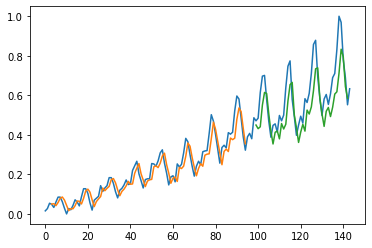

In [6]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: ', scaler.inverse_transform(numpy.array([[trainScore]])))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: ', scaler.inverse_transform(numpy.array([[testScore]])))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()